In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from all_formulas import *
from sklearn.model_selection import ParameterGrid

### Time series of model

In [2]:
b = 7.61
q0 = 1-1e-6
m = 20000
n = 1
a0 = 3
a1 = 7.7
tim = 5
init_pop = [1,0]
T = 5
q1 = 1-3e-6
ttr = 100

In [3]:
2.3/3

0.7666666666666666

In [4]:
test_a1low = simulation(init_pop,b,a0,7.7,q0,q1,m,n,tim,ttr)
test_a1inter1 = simulation(init_pop,b,a0,8.1,q0,q1,m,n,tim,ttr)
test_a1inter2 = simulation(init_pop,b,a0,8.7,q0,q1,m,n,tim,ttr)
test_a1high = simulation(init_pop,b,a0,10,q0,q1,m,n,tim,ttr)
time_range = np.arange(0,30,0.001)

### 1) Plausibility without treatment

In [5]:
data_simulated = pd.read_excel('simulated_Kimetal.xlsx')
data_real = pd.read_excel('real_data_Kimetal.xlsx')
data_neant = pd.read_csv('neant_dataset.csv', sep = ';')

In [6]:
data_neant

,ID,time_monolix,y,cens,type,age_cat_reg,sex,age_cat_cov,delai_monolix,"pulm,"
0,11,19,"8,57601",0,1,0,0,1,19,0
1,11,20,"6,40197",0,1,0,0,1,19,0
2,11,21,"5,91489",0,1,0,0,1,19,0
3,11,22,"6,22674",0,1,0,0,1,19,0
4,11,23,"2,751",1,1,0,0,1,19,0
...,...,...,...,...,...,...,...,...,...,...
2529,1721,30,0,0,2,1,0,2,21,"0,"
2530,1721,0,0,0,2,1,0,2,21,"0,"
2531,1722,19,"2,751",1,1,0,0,1,18,0
2532,1722,23,0,0,2,0,0,1,18,"0,"


In [7]:
patients = data_simulated.columns[1:]

NameError: name 'test' is not defined

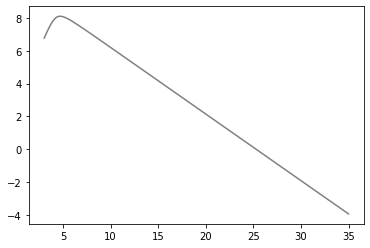

In [11]:
for patient in patients:
    plt.plot(data_simulated['Time']+3, data_simulated[patient]+3, c = 'grey')
    plt.plot(time_range,np.log10(test[:,0]), c = 'red')
    plt.xlim(-15,30)
    plt.ylim(2,11)

In [14]:
time_range

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00])

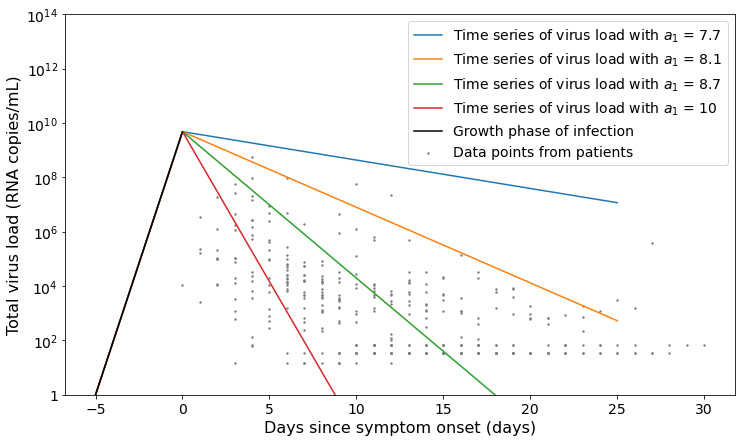

In [18]:
fig, ax = plt.subplots(figsize = (12,7))

switch = True

ax.plot(time_range-5,np.log10(test_a1low[:,0]), c = 'C0', label = 'Time series of virus load with $a_1$ = 7.7')
ax.plot(time_range-5,np.log10(test_a1inter1[:,0]), c = 'C1', label = 'Time series of virus load with $a_1$ = 8.1')
ax.plot(time_range-5,np.log10(test_a1inter2[:,0]), c = 'C2', label = 'Time series of virus load with $a_1$ = 8.7')
ax.plot(time_range-5,np.log10(test_a1high[:,0]), c = 'C3', label = 'Time series of virus load with $a_1$ = 10')
ax.plot(time_range[:5000]-5,np.log10(test_a1high[:,0][:5000]), c = 'k', label = 'Growth phase of infection')
for patient in patients:
    if switch:
        label_string = 'Data points from patients'
        switch = False
    else:
        label_string = '__nolabel__'
    ax.scatter(data_real[data_real['ID'] == patient]['time'],data_real[data_real['ID'] == patient]['Viralload'], 
               c = 'grey', s = 2, label = label_string)
ax.set_ylim(0,14)
ax.tick_params(labelsize = 14)
ax.set_xlabel('Days since symptom onset (days)', fontsize = 16)
ax.set_ylabel('Total virus load (RNA copies/mL)', fontsize = 16)
ax.set_yticks([0,2,4,6,8,10,12,14])
ax.set_yticklabels(['1','$10^2$', '$10^4$', '$10^6$', '$10^8$', '$10^{10}$', '$10^{12}$', '$10^{14}$'])
ax.legend(fontsize = 14)
plt.savefig('plausibility_without_treatment_JUNE10.jpg', dpi = 400, bbox_inches = 'tight')

### 2) Plausibility with treatment

In [84]:
test_notreat = simulation(init_pop,b,a0,8,q0,q0,m,n,tim,ttr)
test_withtreat = simulation(init_pop,b,a0,8,q0,q1,m,n,tim,2)

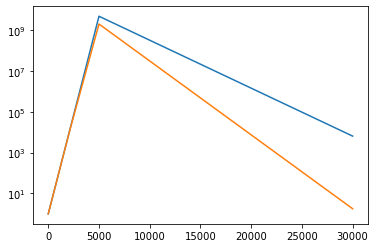

In [85]:
plt.plot(test_notreat[:,0])
plt.plot(test_withtreat[:,0])
plt.yscale('log')

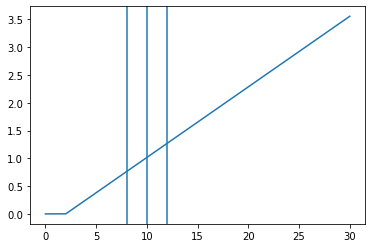

In [86]:
plt.plot(time_range, np.log10(test_notreat[:,0])-np.log10(test_withtreat[:,0]))
plt.axvline(8)
plt.axvline(10)
plt.axvline(12)

In [9]:
ttr_range = [5]
a1_range = [7.7,10]
m_range = [10000,20000]

In [10]:
param_dict = {'m':m_range, 'a1':a1_range, 'ttr':ttr_range}
param_grid = list(ParameterGrid(param_dict))

In [11]:
for paramset in param_grid:
    mval, a1val, ttrval = paramset['m'], paramset['a1'], paramset['ttr']
    
    notreat =  simulation(init_pop,b,a0,a1val,q0,q0,mval,n,tim,ttrval)
    withtreat =  simulation(init_pop,b,a0,a1val,q0,q1,mval,n,tim,ttrval)
    
    difference_day3 = np.log10(notreat[:,0][3000+ttrval*1000])-np.log10(withtreat[:,0][3000+ttrval*1000])
    difference_day5 = np.log10(notreat[:,0][5000+ttrval*1000])-np.log10(withtreat[:,0][5000+ttrval*1000])
    difference_day7 = np.log10(notreat[:,0][7000+ttrval*1000])-np.log10(withtreat[:,0][7000+ttrval*1000])
    
    print(paramset)
    print('Day 3', difference_day3)
    print('Day 5', difference_day5)
    print('Day 7', difference_day7)

{'a1': 7.7, 'm': 10000, 'ttr': 5}
Day 3 0.194386664858472
Day 5 0.3239864147474414
Day 7 0.453586164636409
{'a1': 7.7, 'm': 20000, 'ttr': 5}
Day 3 0.38108068229308323
Day 5 0.6351514085368883
Day 7 0.8892221347806917
{'a1': 10, 'm': 10000, 'ttr': 5}
Day 3 0.1944313851518107
Day 5 0.32406095055738415
Day 7 0.45369051596296184
{'a1': 10, 'm': 20000, 'ttr': 5}
Day 3 0.3811683544070359
Day 5 0.6352975326236003
Day 7 0.8894267108401706


In [20]:
from math import comb
print(comb(10,3))

120


In [32]:
7*0.6

4.2

In [33]:
p = 0.6
cumul = 0

for n in range(8):
    cumul = comb(7,n)*(p**n)*(1-p)**(7-n)
    print(n, cumul)

0 0.0016384000000000006
1 0.01720320000000001
2 0.07741440000000002
3 0.193536
4 0.29030400000000006
5 0.2612736
6 0.13063679999999997
7 0.027993599999999993


In [28]:
p = 0.7
cumul = 0

for n in range(200):
    cumul += comb(200,n)*(p**n)*(1-p)**(200-n)
    print(n, 1-cumul)

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 0.9999999999999999
84 0.9999999999999998
85 0.9999999999999993
86 0.9999999999999978
87 0.9999999999999932
88 0.9999999999999795
89 0.9999999999999389
90 0.9999999999998225
91 0.999999999999494
92 0.9999999999985859
93 0.9999999999961252
94 0.9999999999895895
95 0.9999999999725738
96 0.9999999999291483
97 0.99999999982051
98 0.9999999995540876
99 0.9999999989135971
100 0.9999999974041747
101 0.9999999939170601
102 0.999999